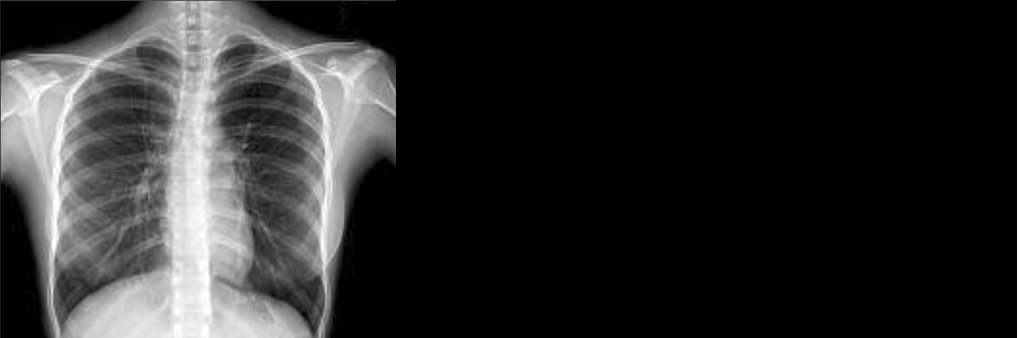

# Detector de Neumonia

Link al dataset:
https://drive.google.com/drive/folders/1GTfp_Bc1Te6En7Q1i4oPcEk0S1qw70M-?usp=sharing

# Importacion de paquetes

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sklearn

#Barra de carga
from tqdm import tqdm
import skimage
from skimage.color import rgb2gray
from skimage.transform import resize
import glob
import random
import os
import datetime
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("tensorflow",tf.__version__)

tensorflow 2.3.0


# Obtención del dataset

In [2]:
directorio_entrenamiento = "data/train"
directorio_test = "data/test"

#obtener data por primera vez cambiar a True, caso contrario False
LOAD_FROM_IMAGES = False

def obtener_data(carpeta):
    """
    Recorrer directorio (carpeta)
    crea dos arreglos para las variables dependientes y otro para
    el target.
    asigna una etiqueta (normal = 0 o neumonia = 1) a las imagennes
    """
    X = []
    y = []
    for nombreCarpeta in os.listdir(carpeta):
   
        if nombreCarpeta == 'NORMAL':
            label = 0
            print(f"nombre de carpeta: {nombreCarpeta}, nombre de label: {label}")
        elif nombreCarpeta == 'PNEUMONIA':
            label = 1
            print(f"nombre de carpeta: {nombreCarpeta}, nombre de label: {label}")
        else:
            label = 2
            print(f"nombre de carpeta: {nombreCarpeta}, nombre de label: {label}")
            
    
        
        for nombreImagen in tqdm(os.listdir(carpeta + '/' + nombreCarpeta), desc='dirs'):
#             print(f"nombre de carpeta {nombreCarpeta}, nombre de label {label}, nombre imagen{nombreImagen}")
            imagen_archivo = cv2.imread(carpeta + '/' + nombreCarpeta+ '/' + nombreImagen)
            if imagen_archivo is not None:
                #ajustar el size de la imagen
                imagen_archivo = skimage.transform.resize(imagen_archivo, (150,150,3), mode='constant', anti_aliasing=True)
                #convertir en escala de grises
                imagen_archivo = rgb2gray(imagen_archivo)
                #convertir imagen en formato de numpy
                array_imagen = np.array(imagen_archivo)
                X.append(array_imagen)
                y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    
    #retornamos ambos arreglos
    return X,y

X_train, y_train = "",""
X_test, y_test = "",""

#grabamos los np si no existe, sino cargamos los guardados
if LOAD_FROM_IMAGES:
    X_train, y_train = obtener_data(directorio_entrenamiento)
    X_test, y_test = obtener_data(directorio_test)
    
    #Lo almacenamos en el disco
    np.save('X_train.npy', X_train)
    np.save('y_train.npy', y_train)
    np.save('X_test.npy', X_test)
    np.save('y_test.npy', y_test)
    
    print("Se ha GUARDADO existosamente")
else:
    #Cargamos los almacenados
    X_train =   np.load('X_train.npy')
    y_train =   np.load('y_train.npy')
    X_test  =   np.load('X_test.npy')
    y_test  =   np.load('y_test.npy')
    
    
    print("Se ha CARGADO existosamente")
    



Se ha CARGADO existosamente


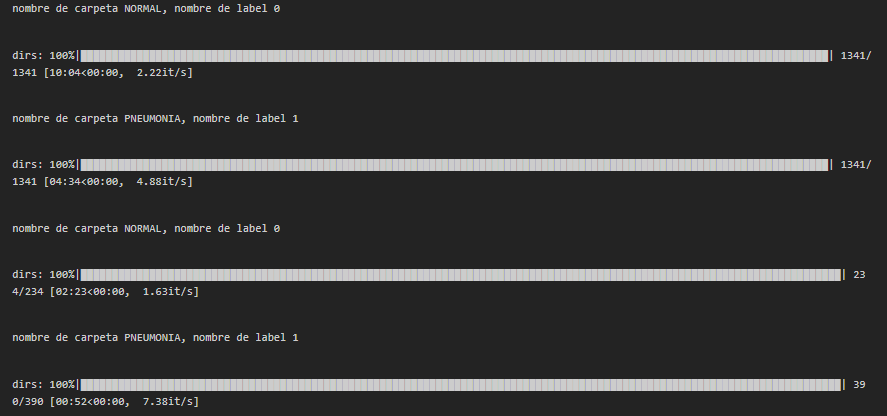

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


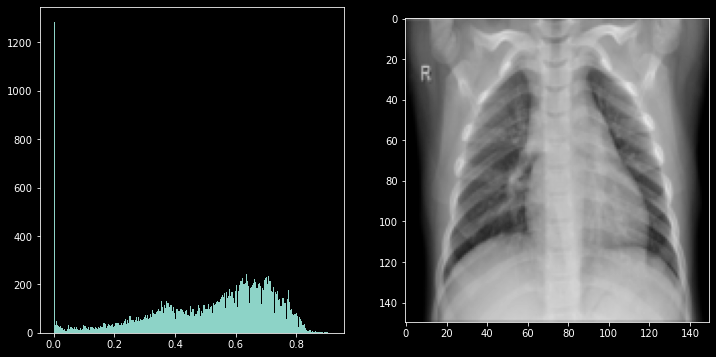

0


In [3]:
plt.style.use('dark_background')
def plotHistograma(imagen):
    """
    Mostrar graficamente 
    """
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(imagen.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(imagen, cmap='gray', vmin=0, vmax=1)
    plt.show()
    
plotHistograma(X_train[5])
print(y_train[5])


In [ ]:
# multiplesImagenes = glob.glob(directorio_entrenamiento + '/' + 'NORMAL/**')

# def plotTresImagenes(multiplesImagenes):
#     muestras = random.sample(multiplesImagenes, 3)
#     plt.figure(figsize=(50,20))
#     plt.subplot(131)
#     plt.imshow(cv2.imread(muestras[0]))
#     plt.subplot(132)
#     plt.imshow(cv2.imread(muestras[1]))
#     plt.subplot(133)
#     plt.imshow(cv2.imread(muestras[2]))


# plotTresImagenes(multiplesImagenes)    

In [64]:
#PNEUMONIA NORMAL
def plotImages(tipo,directorio_entrenamiento):
    """
    Plot ejemplos de las imagenes
    """
    
    multiplesImagenes = glob.glob(directorio_entrenamiento + '/' + tipo + '/**')
    
    if tipo == 'NORMAL':
        print("Imagenes sin Neumonia")
    else:
        print("Imagenes con Neumonia")
    i_ = 0
    
    plt.rcParams['figure.figsize'] =  (20.0, 25.0)
    plt.subplots_adjust(wspace=0.1, hspace=0.1, )
    for l in multiplesImagenes[:9]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128, 128))
        
        plt.subplot(5,3, i_ + 1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        i_ += 1




Imagenes con Neumonia


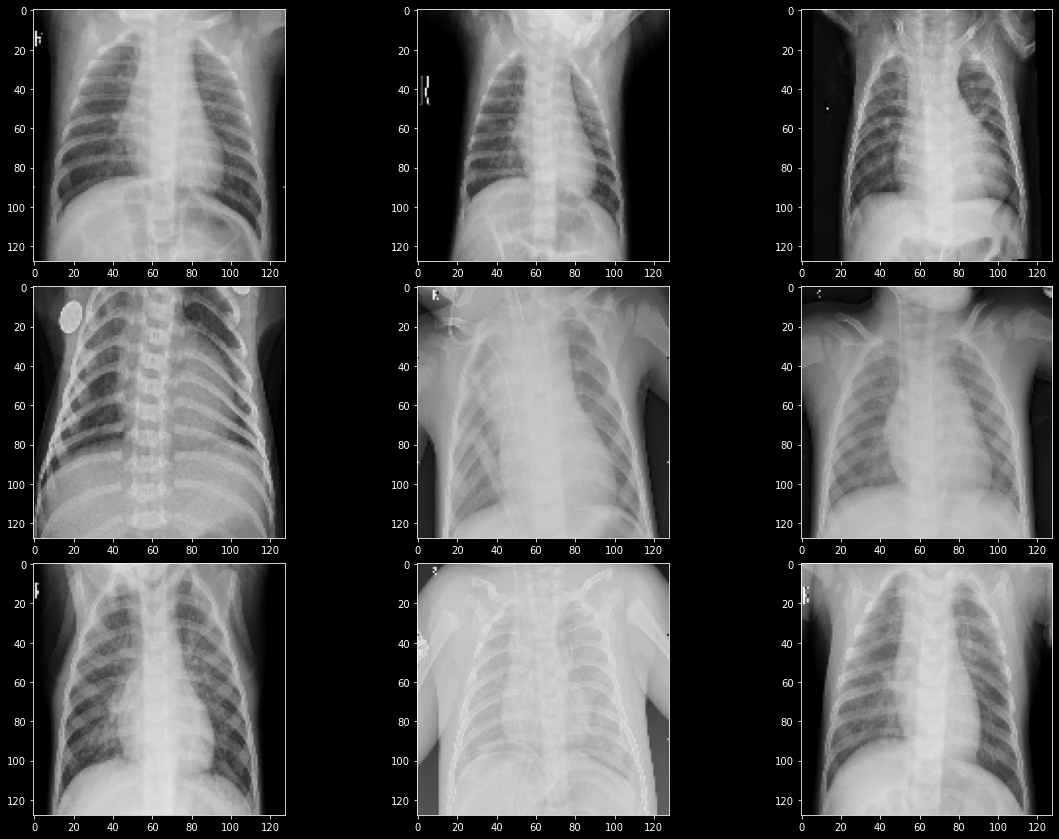

In [65]:
#tipo = PNEUMONIA NORMAL
tipo = "PNEUMONIA"

plotImages(tipo,directorio_entrenamiento)

Imagenes sin Neumonia


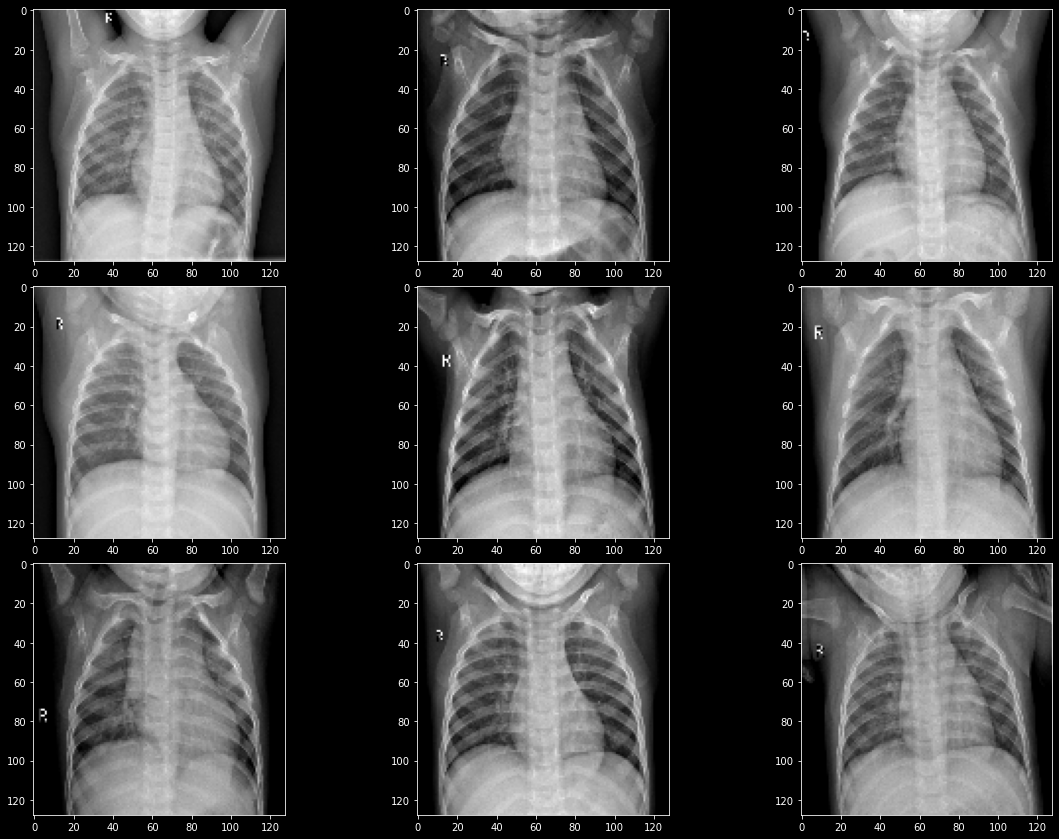

In [66]:
#PNEUMONIA NORMAL
tipo = "NORMAL"
plotImages(tipo,directorio_entrenamiento)

# Balance del dataset

{0: 'Sin Neumonia', 1: 'Con Neumonia'}


C:\Users\aleon\Miniconda3\envs\rx_neumonia_2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


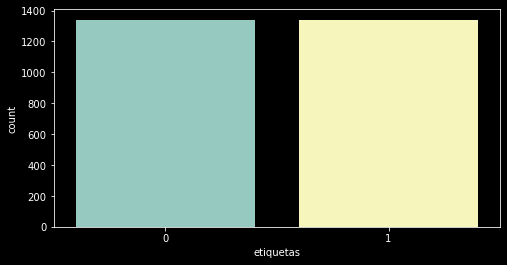

In [17]:

plt.figure(figsize=(8,4))
mapa_leyenda = {0: "Sin Neumonia", 1 : "Con Neumonia"}

df = pd.DataFrame()
df['etiquetas'] = y_train

lab = df['etiquetas']
dist = lab.value_counts()
ax = sns.countplot(lab, palette="Set3")
# sns.countplot(lab)
print(mapa_leyenda)

# Desarrollo del modelo

In [41]:
X_trainReformada = X_train.reshape(len(X_train), 150,150,1)
X_testReformada = X_test.reshape(len(X_test), 150,150,1)

print("X train reformada: ", X_trainReformada.shape, "X test reformada: ", X_testReformada.shape)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

X train reformada:  (2682, 150, 150, 1) X test reformada:  (624, 150, 150, 1)


In [57]:

model = models.Sequential()
model.add(layers.Conv2D(64, (3 ,3), activation='relu', input_shape = (150, 150, 1)  ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3 ,3), activation='relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3 ,3), activation='relu' ))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3 ,3), activation='relu' ))

model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu' ))
model.add(layers.Dense(2 , activation='softmax'))



In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)       

In [59]:
model.compile(optimizer = 'adam',
              metrics = ['accuracy'],
              loss = 'sparse_categorical_crossentropy')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M")

tensorBoard_callbck = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq = 1 )
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



In [60]:
model.fit(X_trainReformada,
          y_train,
         epochs=10,
          validation_data=(X_testReformada, y_test),
          callbacks=[tensorBoard_callbck, stop_early] )

Epoch 1/10
84/84 [==============================] - 134s 2s/step - loss: 0.4875 - accuracy: 0.7349 - val_loss: 0.4236 - val_accuracy: 0.7917
Epoch 2/10
84/84 [==============================] - 216s 3s/step - loss: 0.2082 - accuracy: 0.9183 - val_loss: 0.5671 - val_accuracy: 0.7933
Epoch 3/10
84/84 [==============================] - 135s 2s/step - loss: 0.1635 - accuracy: 0.9377 - val_loss: 0.6593 - val_accuracy: 0.7676
Epoch 4/10
84/84 [==============================] - 119s 1s/step - loss: 0.1266 - accuracy: 0.9545 - val_loss: 0.6366 - val_accuracy: 0.7981
Epoch 5/10
84/84 [==============================] - 139s 2s/step - loss: 0.1018 - accuracy: 0.9646 - val_loss: 0.7888 - val_accuracy: 0.7500
Epoch 6/10
84/84 [==============================] - 129s 2s/step - loss: 0.0998 - accuracy: 0.9642 - val_loss: 0.5585 - val_accuracy: 0.8429


In [61]:
train_loss, train_acc = model.evaluate(X_trainReformada, y_train)
print(train_loss, train_acc)

84/84 [==============================] - 60s 718ms/step - loss: 0.0613 - accuracy: 0.9758
0.061329811811447144 0.9757643342018127


In [62]:
test_loss, test_acc = model.evaluate(X_testReformada, y_test)
print(test_loss, test_acc)


20/20 [==============================] - 14s 714ms/step - loss: 0.5585 - accuracy: 0.8429
0.5585350394248962 0.8429487347602844


## Predicción/Evaluación

In [63]:
directorio_val = "data/val"
X_val, y_val = obtener_data(directorio_val)

nombre de carpeta: NORMAL, nombre de label: 0


dirs: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.36it/s]


nombre de carpeta: PNEUMONIA, nombre de label: 1


dirs: 100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.98it/s]


Imagenes sin Neumonia


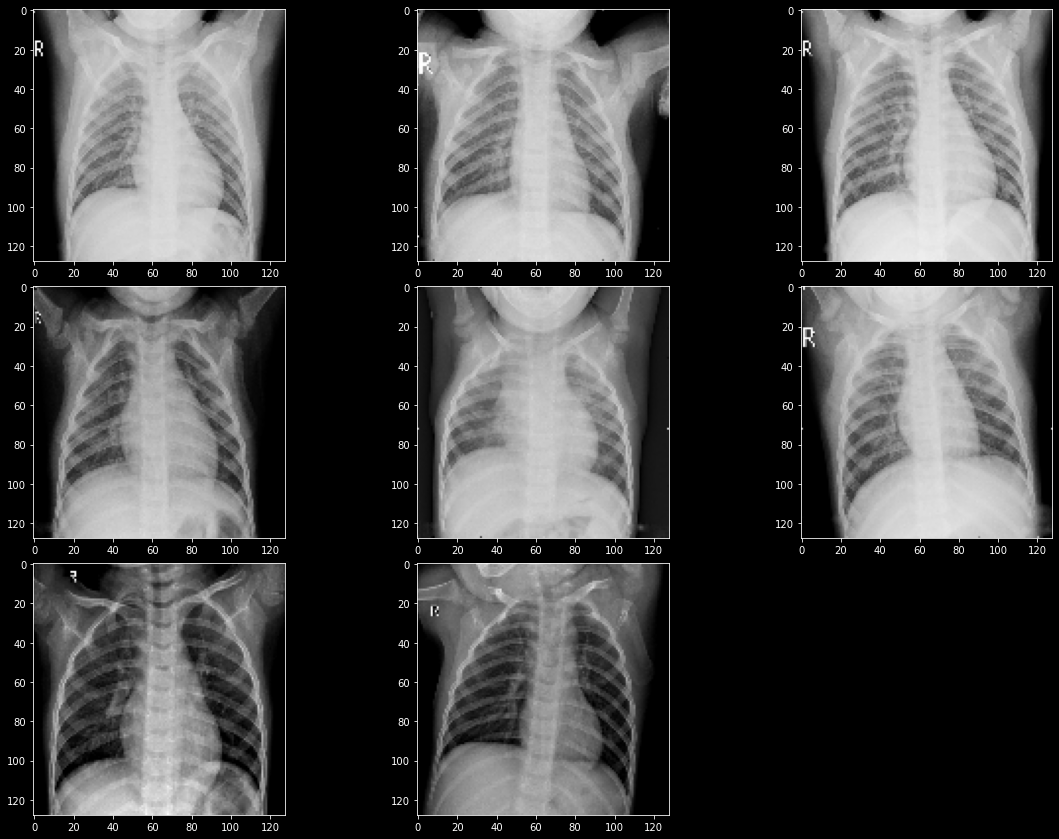

In [68]:
tipo = "NORMAL"
plotImages(tipo, directorio_val)

Imagenes con Neumonia


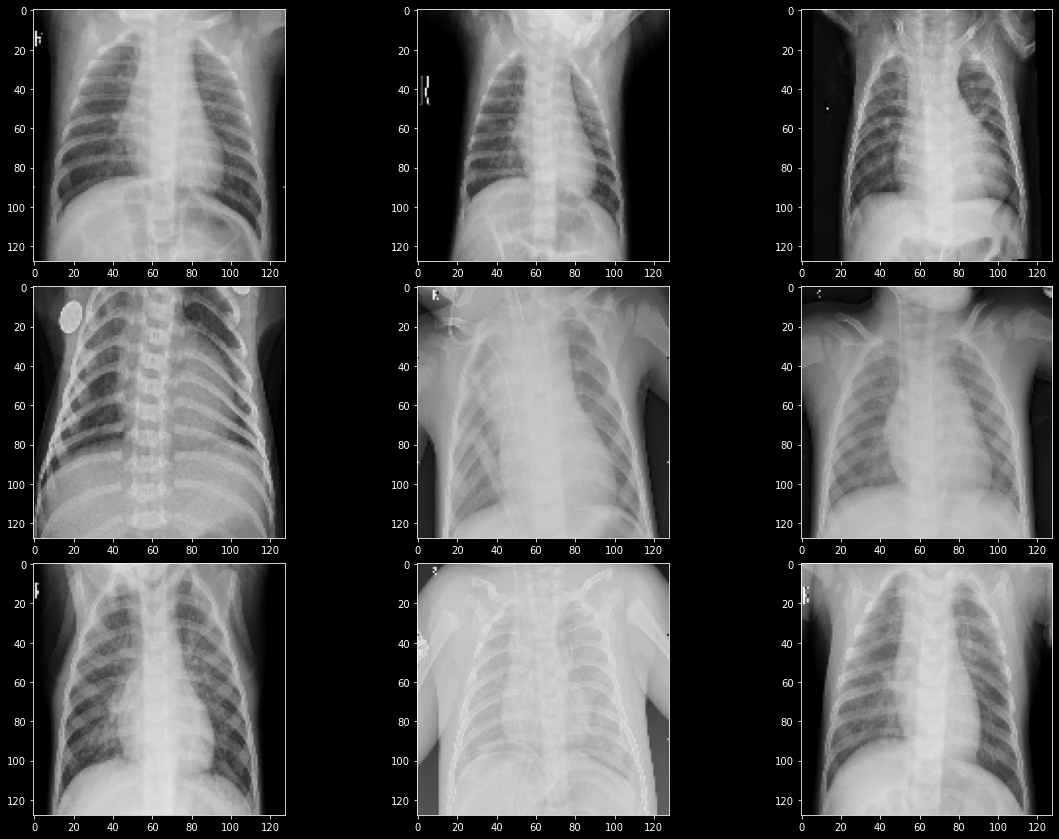

In [69]:
#PNEUMONIA NORMAL
tipo = "PNEUMONIA"
plotImages(tipo,directorio_entrenamiento)

In [71]:
X_val.shape
X_valReformada = X_val.reshape(len(X_val), 150,150,1)

In [74]:
val_loss, val_acc = model.evaluate(X_valReformada, y_val)


1/1 [==============================] - 0s 999us/step - loss: 0.2745 - accuracy: 0.8125
0.2745048701763153 0.8125


1


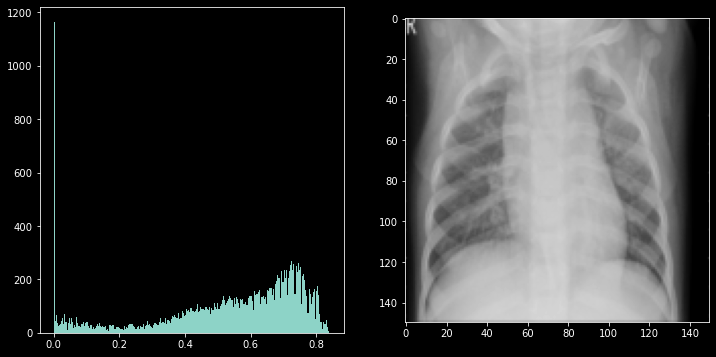

In [96]:
print(y_val[10])
plotHistograma(X_valReformada[10])


In [84]:
predicciones = model.predict( X_valReformada )

In [93]:
for i in range(len(prediccion)):
    print(i, "  Prediccion" ,np.argmax(prediccion[i]), "Real ",y_val[i])

0   Prediccion 1 Real  0
1   Prediccion 0 Real  0
2   Prediccion 0 Real  0
3   Prediccion 1 Real  0
4   Prediccion 0 Real  0
5   Prediccion 1 Real  0
6   Prediccion 0 Real  0
7   Prediccion 0 Real  0
8   Prediccion 1 Real  1
9   Prediccion 1 Real  1
10   Prediccion 1 Real  1
11   Prediccion 1 Real  1
12   Prediccion 1 Real  1
13   Prediccion 1 Real  1
14   Prediccion 1 Real  1
15   Prediccion 1 Real  1


# Conservar modelo

In [95]:
model.save('model_25-1-2022')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_25-1-2022\assets


In [ ]:
# new_model = tf.keras.models.load_model('saved_model/my_model')